# <center>Project 03: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Lê Nguyễn Nhật Khánh
- MSSV: 23127206
- Lớp: 23CLC04

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Thiết lập kích thước mặc định cho các biểu đồ và font chữ
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
# Import thêm thư viện nếu cần

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu  bằng pandas
train = pd.read_csv('p03.train.csv')
test = pd.read_csv('p03.test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [3]:
#Cài đặt các hàm cần thiết ở đây
class OLSLinearRegression:
    def __init__(self):
        #Khởi tạo mô hình OLS với không bias
        self.w = None # Weights vector        
        self.intercept_ = 0.0 # Set bias = 0
    
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : Dataframe
            Input data
        y : Series
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        '''
        
        # Chuyển sang mảng numpy
        if hasattr(X, 'values'):
            X_array = X.values
        else:
            X_array = np.array(X)
            
        if hasattr(y, 'values'):
            y_array = y.values
        else:
            y_array = np.array(y)
        
        X_pinv = np.linalg.inv(X_array.T @ X_array) @ X_array.T
        self.w = X_pinv @ y_array
        
        return self
    
    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : Dataframe
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''
        
        if self.w is None:
            raise ValueError("Mô hình chưa được huấn luyện!")
        
        if hasattr(X, 'values'):
            X_array = X.values
        else:
            X_array = np.array(X)
        
        #Trả về kết quả dự đoán được
        return X_array @ self.w
    
    def get_params(self):
        ''' 
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters
        '''
        return self.w

def calculate_mse(y_true, y_pred):
    '''
    Count the MSE
    
    Parameters
    ----------
    y_true : Series
        Real value
    y_pred : Series  
        Predict value
        
    Returns
    -------
    float
        Mean Squared Error
    '''
    if hasattr(y_true, 'values'):
        y_true = y_true.values
    if hasattr(y_pred, 'values'):
        y_pred = y_pred.values
    
    residuals = np.array(y_true) - np.array(y_pred)
    mse = np.mean(residuals ** 2)
    return float(mse)

def process_train_data(train):
    '''
    Delete duplicate and shuffle data
    
    Parameters
    ----------
    train : pd.DataFrame
        
    Returns
    -------
    train_new : pd.DataFrame
    X_train : pd.DataFrame
    y_train : pd.Series
    '''
    
    #Kiểm tra duplicate
    initial_count = len(train)
    duplicate_count = train.duplicated().sum()
    
    #Xóa các duplicate
    train_clean = train.drop_duplicates().reset_index(drop=True)
    removed_count = initial_count - len(train_clean)
    
    #Shuffle data
    train_new = train_clean.sample(frac=1, random_state=42).reset_index(drop=True)

    #Tách train thành X và y
    X_train = train_new.iloc[:, :-1]
    y_train = train_new.iloc[:, -1] 
    
    return train_new, X_train, y_train

def plot_train_histograms(X_train, y_train):
    '''
    Draw histogram for all features and target in train
    
    Parameters
    ----------
    X_train : pd.DataFrame
    y_train : pd.Series
    '''
    features = X_train
    target = y_train
    target_name = train.columns[-1]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    # Vẽ histogram cho từng feature
    for i, column in enumerate(features.columns):
        axes[i].hist(train[column], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'{column}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Values')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)
        
        mean_val = train[column].mean()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].legend()
    
    # Vẽ histogram cho target
    axes[5].hist(target, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[5].set_title(f'{target_name} (TARGET)', fontsize=12, fontweight='bold', color='darkred')
    axes[5].set_xlabel('Values')
    axes[5].set_ylabel('Frequency')
    axes[5].grid(True, alpha=0.3)
    
    mean_target = target.mean()
    axes[5].axvline(mean_target, color='red', linestyle='--', label=f'Mean: {mean_target:.2f}')
    axes[5].legend()
    
    plt.suptitle('Train Data - Features & Target Histograms', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_feature_vs_target_scatter():
    '''
    Draw scatter plot of every feature with target
    '''
    features = X_train.columns
    n_features = len(features)
    
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        # Scatter plot
        axes[i].scatter(X_train[feature], y_train, alpha=0.6, color='skyblue', edgecolor='black')
        
        # Trend line
        z = np.polyfit(X_train[feature], y_train, 1)
        p = np.poly1d(z)
        axes[i].plot(X_train[feature], p(X_train[feature]), "r--", alpha=0.8, linewidth=2)
        
        # Formatting
        axes[i].set_title(f'{feature} vs Performance Index', fontweight='bold')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Performance Index')
        axes[i].grid(True, alpha=0.3)
        
        # Hệ số tương quan
        corr = np.corrcoef(X_train[feature], y_train)[0, 1]
        axes[i].text(0.02, 0.98, f'Correlation: {corr:.3f}', 
                    transform=axes[i].transAxes, 
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Hide extra subplot
    axes[5].set_visible(False)
    
    plt.suptitle('Feature vs Target Relationships (Scatter Plots)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap():
    '''
    Draw Correlation Heatmap
    '''
    # Tính correlation matrix
    corr = train.corr(numeric_only=True)
    
    # Vẽ heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, 
                annot=True,           # Hiển thị số correlation
                cmap='RdYlBu_r',      # Color: Đỏ-Vàng-Xanh
                center=0,             # Trung tâm tại 0
                fmt='.3f',            # Format 3 chữ số thập phân
                linewidths=0.5,       # Đường viền rõ hơn
                square=True)          # Ô vuông đều
    
    plt.title('Correlation Heatmap - Performance Index Analysis', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
def k_fold_cross_validation_unified(models_dict, y_train, k=5):
    """
    Unified k-fold cross validation for models
    
    Parameters:
    -----------
    models_dict : dict
        Dictionary {model_name: X_dataframe}
    y_train : pd.Series
        Target values
    k : int
        Number of folds (default=5)
        
    Returns:
    --------
    best_X_data : pd.DataFrame
        The dataframe of model which have the smallest MSE
    """
    
    n_samples = len(y_train)
    fold_size = n_samples // k
    all_results = {}
    
    # Đánh giá từng model
    for model_name, X_model in models_dict.items():
        fold_mse_scores = []
        
        # K-fold CV cho model này
        for fold in range(k):
            
            # Tính vị trí bắt đầu và kết thúc cho fold
            start_idx = fold * fold_size
            end_idx = (fold + 1) * fold_size if fold < k-1 else n_samples
            
            # Chia dữ liệu theo thứ tự
            X_val = X_model.iloc[start_idx:end_idx]
            y_val = y_train.iloc[start_idx:end_idx]
            
            X_train_fold = pd.concat([
                X_model.iloc[:start_idx], 
                X_model.iloc[end_idx:]
            ], ignore_index=True)
            y_train_fold = pd.concat([
                y_train.iloc[:start_idx], 
                y_train.iloc[end_idx:]
            ], ignore_index=True)
            
            # Train, predict và tính MSE
            model_fold = OLSLinearRegression()
            model_fold.fit(X_train_fold, y_train_fold)
            y_pred_val = model_fold.predict(X_val)
            mse_fold = calculate_mse(y_val, y_pred_val)
            
            fold_mse_scores.append(mse_fold)
        
        # Lưu kết quả
        all_results[model_name] = float(np.mean(fold_mse_scores))
    
    # Sắp xếp theo MSE tăng dần
    sorted_results = sorted(all_results.items(), key=lambda x: x[1])
    
    # Thông báo ra kết quả
    print("BẢNG KẾT QUẢ K-FOLD CROSS VALIDATION")
    print("="*65)
    print(f"{'STT':<3} {'Mô hình':<40} {'Mean MSE':<15}")
    print("-"*65)
    
    for i, (model_name, mean_mse) in enumerate(sorted_results, 1):
        print(f"{i:<3} {model_name:<40} {mean_mse:<15.6f}")
    
    print("-"*65)
   
    best_model_name = sorted_results[0][0]
    best_mse = sorted_results[0][1]
    
    print(f"\nKẾT QUẢ TỐT NHẤT")
    print("="*40)
    print(f"   • Mô hình tốt nhất: {best_model_name}")
    print(f"   • Mean MSE: {best_mse:.6f}")
    
    # Trả về dataframe của model tốt nhất
    return best_model_name, models_dict[best_model_name]

def create_test_data(X_test, model_name):
    """
    Make test data for model
    
    Parameters:
    -----------
    X_test : pd.dataframe
        Test dataframe
    model_name : str
        Name of best model
        
    Returns:
    --------
        pd.DataFrame
        The dataframe of test
    """
    if model_name == 'Polynomial':
        return pd.DataFrame({
            'prev_1': X_test['Previous Scores'],
            'prev_2': X_test['Previous Scores'] ** 2,
            'prev_3': X_test['Previous Scores'] ** 3
        })
    elif model_name == 'Study-Health Balance':
        return pd.DataFrame({
            'Hours Studied': X_test['Hours Studied'],
            'Sleep Hours': X_test['Sleep Hours']
        })
    elif model_name == 'Learning Interaction':
        return pd.DataFrame({
            'Hours_Sample_Interaction': X_test['Hours Studied'] * X_test['Sample Question Papers Practiced']
        })
    elif model_name == 'Learning Efficiency':
        return pd.DataFrame({
            'Score_Per_Hour': X_test['Previous Scores'] / (X_test['Hours Studied'] + 1),
            'Practice_Intensity': X_test['Sample Question Papers Practiced'] / (X_test['Hours Studied'] + 1)
        })
    elif model_name == 'Academic Profile':
        return pd.DataFrame({
            'Previous Scores': X_test['Previous Scores'],
            'Sample Question Papers Practiced': X_test['Sample Question Papers Practiced'],
            'Extracurricular Activities': X_test['Extracurricular Activities']
        })
    else:
        raise ValueError(f"Unknown model name: {model_name}")

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu

___THỐNG KÊ DỮ LIỆU CỦA TRAIN___
       Hours Studied  Previous Scores  Extracurricular Activities  \
count    9000.000000      9000.000000                 9000.000000   
mean        4.976444        69.396111                    0.493667   
std         2.594647        17.369957                    0.499988   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

       Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  9000.000000                       9000.000000        9000.000000  
mean      6.535556                          4.590889          55.136333  
std       1.695533                          2.864570          19.187669  
min       4.000000                          0.000

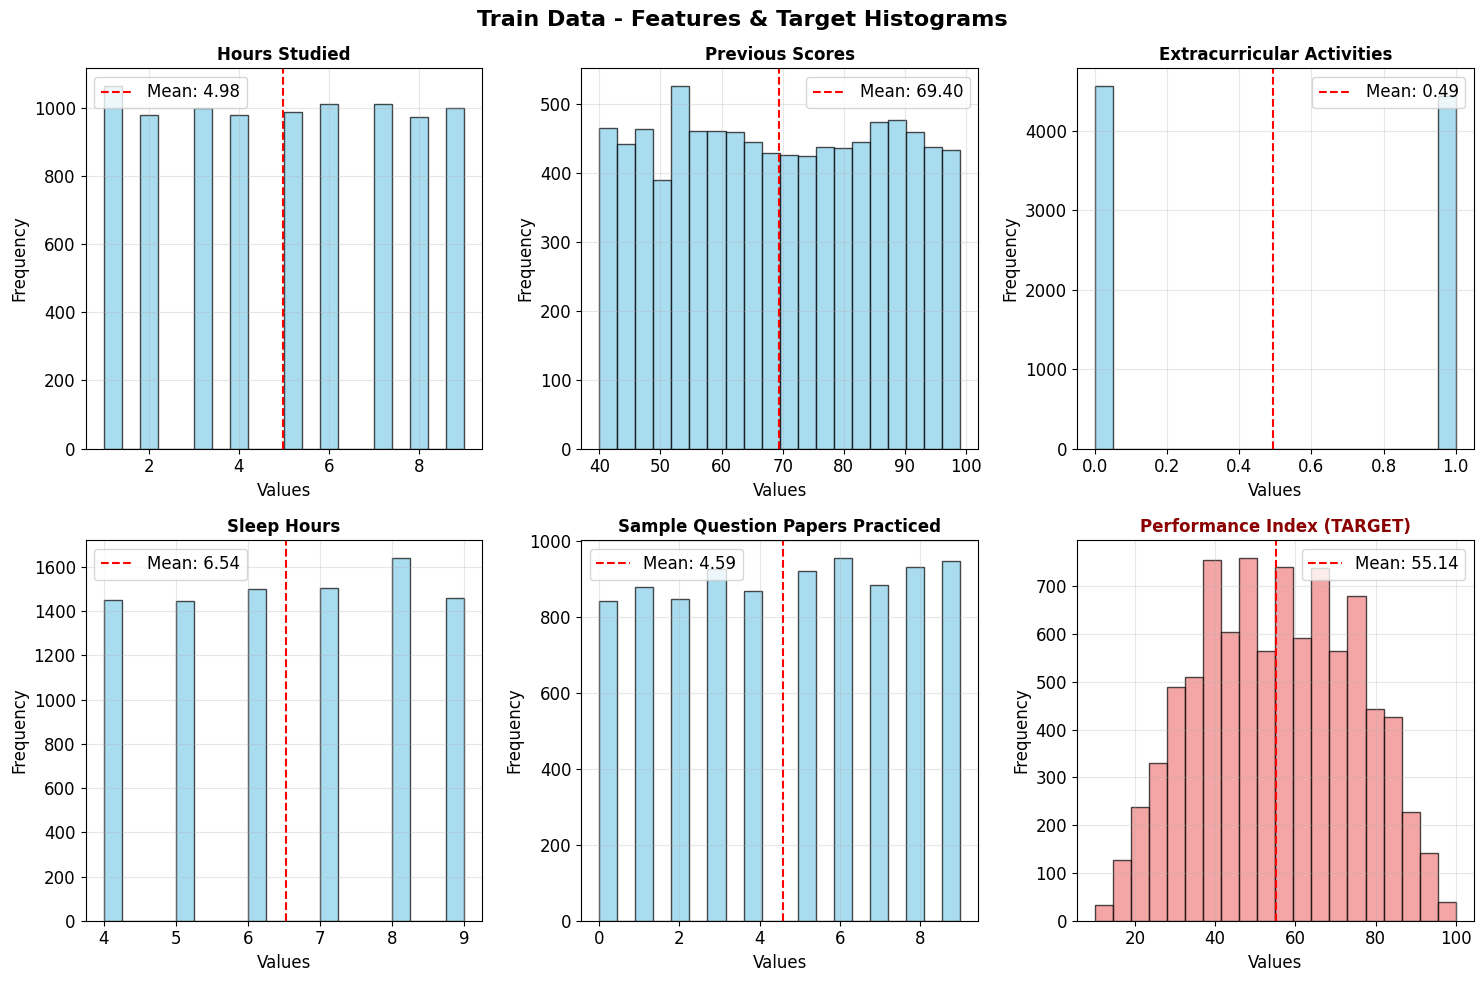

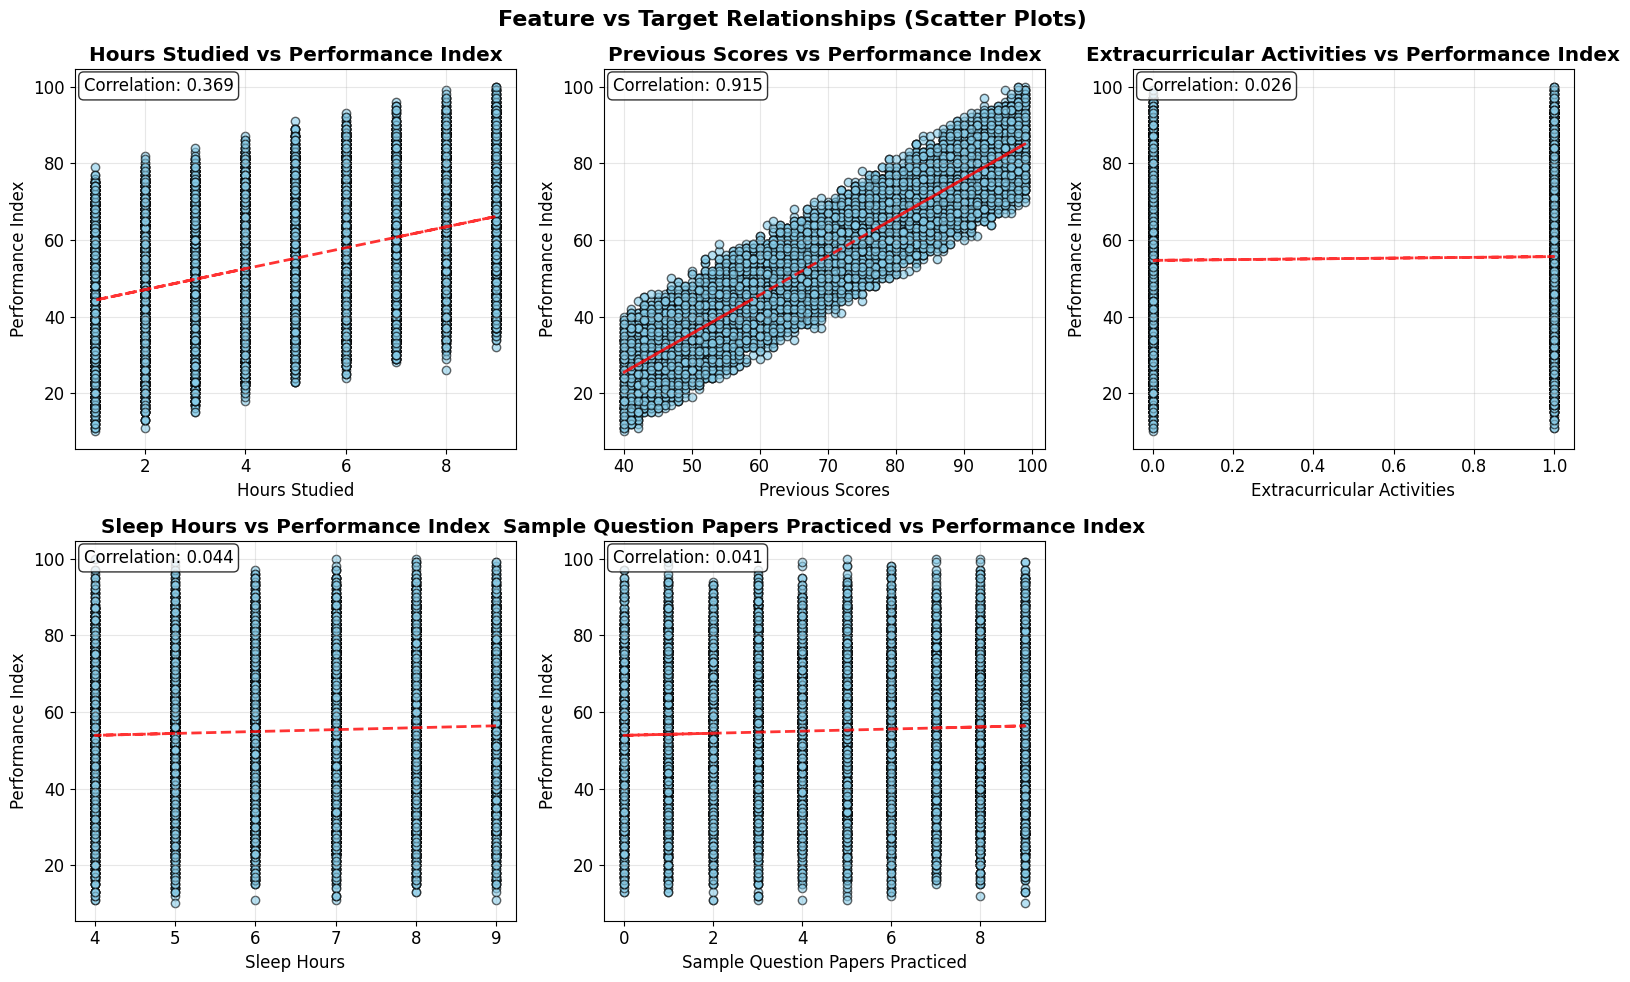

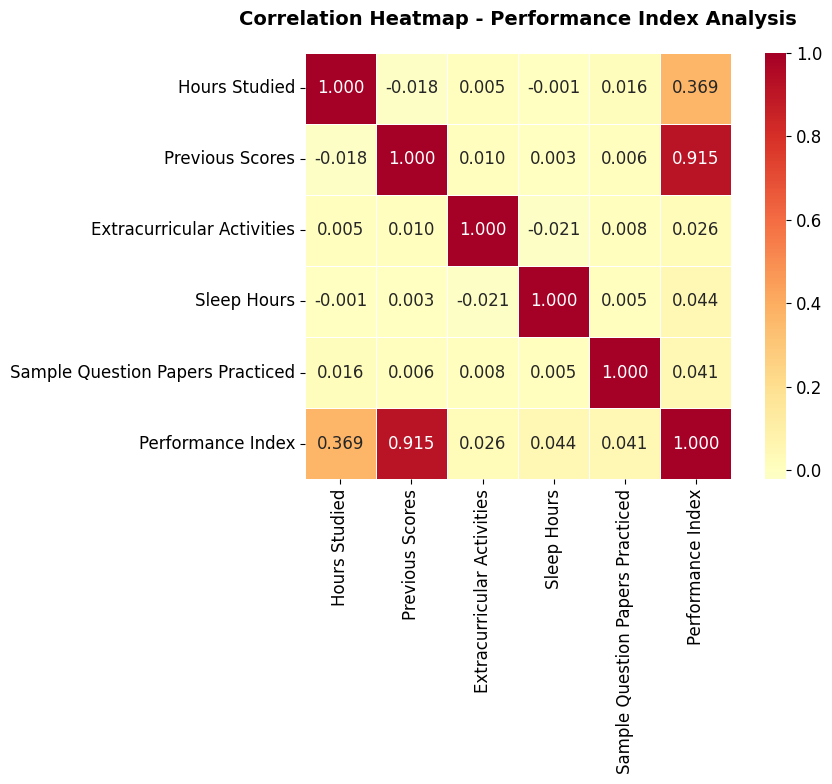

In [4]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện

# Thống kê dữ liệu
print("___THỐNG KÊ DỮ LIỆU CỦA TRAIN___")
print(train.describe())

# Vẽ biểu đồ cột của từng feature riêng
plot_train_histograms(X_train, y_train)

# Vẽ các biểu đồscatter plot
plot_feature_vs_target_scatter()

# Vẽ biểu đồ heatmap
plot_correlation_heatmap()

# Xóa duplicate, shuffle và chia tập train lại
train, X_train, y_train = process_train_data(train)

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp

In [5]:
# Phần code cho yêu cầu 2a
model = OLSLinearRegression()
model.fit(X_train, y_train)

# Lấy weights đã học được và in ra
weights = model.get_params()
print(f"HỆ SỐ")
print("-" * 60)
for i, (feature, weight) in enumerate(zip(X_train.columns, weights), 1):
    print(f"   w{i} | {feature:<40}: {weight:>12.6f}")

HỆ SỐ
------------------------------------------------------------
   w1 | Hours Studied                           :     2.194027
   w2 | Previous Scores                         :     0.817060
   w3 | Extracurricular Activities              :    -1.150036
   w4 | Sleep Hours                             :    -1.500658
   w5 | Sample Question Papers Practiced        :    -0.269084


In [6]:
# Gọi hàm MSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
#Lấy ra giá trị dự đoán và tính bằng hàm
y_pred_test = model.predict(X_test)
test_mse = calculate_mse(y_test, y_pred_test)
print(f"Đánh giá sai số của tập test bằng MSE: {test_mse:.6f}")

Đánh giá sai số của tập test bằng MSE: 36.580184


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 2.194 \times \text{Hours Studied} + 0.817 \times \text{Previous Scores} - 1.150 \times \text{Extracurricular Activities} - 1.501 \times \text{Sleep Hours} - 0.269 \times \text{Sample Question Papers Practiced}$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [7]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu
# Shuffle data
train, X_train, y_train = process_train_data(train)

# Tạo ra các dataframe riêng cho từng feature
models_dict = {}
    
# Lấy từng feature riêng lẻ
for feature_name in X_train.columns:
    models_dict[feature_name] = X_train[[feature_name]]

best_feature_name, best_feature_X = k_fold_cross_validation_unified(models_dict, y_train, 5)

BẢNG KẾT QUẢ K-FOLD CROSS VALIDATION
STT Mô hình                                  Mean MSE       
-----------------------------------------------------------------
1   Previous Scores                          73.397387      
2   Sleep Hours                              535.915510     
3   Hours Studied                            686.114715     
4   Sample Question Papers Practiced         1180.868888    
5   Extracurricular Activities               1877.421092    
-----------------------------------------------------------------

KẾT QUẢ TỐT NHẤT
   • Mô hình tốt nhất: Previous Scores
   • Mean MSE: 73.397387


In [8]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
best_feature_model = OLSLinearRegression()
best_feature_model.fit(best_feature_X, y_train)

# In ra trọng số và tên feature tốt nhất
print(f"{best_feature_name} là feature tốt nhất.\nTrọng số: {best_feature_model.get_params()[0]}")

Previous Scores là feature tốt nhất.
Trọng số: 0.807187122177821


In [9]:
# Gọi hàm MSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
# Tính giá trị dự đoán và tính MSE
X_test_best = X_test[[best_feature_name]]
y_pred_test = best_feature_model.predict(X_test_best)
test_mse = calculate_mse(y_test, y_pred_test)

print(f"Đánh giá trên tập test\nMSE = {test_mse}")

Đánh giá trên tập test
MSE = 74.98282709450379


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$\text{Student Performance} = 0.807 \times \text{Previous Scores}$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất

## Xây dựng/Thiết kế mô hình

In [10]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
# Shuffle data
train, X_train, y_train = process_train_data(train)

#Tạo dict để lưu
models_2c = {}

# Model 1: Polynomial
models_2c['Polynomial'] = pd.DataFrame({
    'prev_1': X_train['Previous Scores'],
    'prev_2': X_train['Previous Scores'] ** 2,
    'prev_3': X_train['Previous Scores'] ** 3
})

# Model 2: Study-Health Balance
models_2c['Study-Health Balance'] = pd.DataFrame({
    'Hours Studied': X_train['Hours Studied'],
    'Sleep Hours': X_train['Sleep Hours']
})

# Model 3: Learning Interaction
models_2c['Learning Interaction'] = pd.DataFrame({
    'Hours_Sample_Interaction': X_train['Hours Studied'] * X_train['Sample Question Papers Practiced']
})

# Model 4: Learning Efficiency
models_2c['Learning Efficiency'] = pd.DataFrame({
    'Score_Per_Hour': X_train['Previous Scores'] / (X_train['Hours Studied'] + 1),
    'Practice_Intensity': X_train['Sample Question Papers Practiced'] / (X_train['Hours Studied'] + 1)
})

# Model 5: Academic Profile
models_2c['Academic Profile'] = pd.DataFrame({
    'Previous Scores': X_train['Previous Scores'],
    'Sample Question Papers Practiced': X_train['Sample Question Papers Practiced'],
    'Extracurricular Activities': X_train['Extracurricular Activities']
})

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [11]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu
best_model_name, best_model_X = k_fold_cross_validation_unified(models_2c, y_train, 5)

BẢNG KẾT QUẢ K-FOLD CROSS VALIDATION
STT Mô hình                                  Mean MSE       
-----------------------------------------------------------------
1   Polynomial                               60.206078      
2   Academic Profile                         72.794092      
3   Study-Health Balance                     391.359037     
4   Learning Efficiency                      1217.013632    
5   Learning Interaction                     1411.657772    
-----------------------------------------------------------------

KẾT QUẢ TỐT NHẤT
   • Mô hình tốt nhất: Polynomial
   • Mean MSE: 60.206078


In [12]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
best_model = OLSLinearRegression()
best_model.fit(best_model_X, y_train)

# In ra trọng số và tên model tốt nhất
print(f"Model tốt nhất là: {best_model_name}")
weights = best_model.get_params()
for i, weight in enumerate(weights, 1):
    print(f"w{i}: {weight:.6f}")

Model tốt nhất là: Polynomial
w1: 0.315213
w2: 0.010310
w3: -0.000049


In [13]:
# Gọi hàm MSE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
# Tạo test data và đánh giá
X_test_best = create_test_data(X_test, best_model_name)
y_pred_test = best_model.predict(X_test_best)
test_mse_2 = calculate_mse(y_test, y_pred_test)

print(f"Đánh giá trên tập test\nMSE = {test_mse_2}")

Đánh giá trên tập test
MSE = 58.93192301213467


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 0.315 \times \text{Previous Scores} + 0.010 \times \text{Previous Scores}^2 - 0.000 \times \text{Previous Scores}^3$$